# Import Libraries

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# View And Clean Dataset

In [70]:
train_dataset = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_dataset = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [71]:
train_dataset.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [72]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [73]:
train_dataset.isna().sum().sum()

6965

There are NaN values in dataset. So, lets clean it with interpolate method

In [74]:
train_dataset = train_dataset.interpolate()
test_dataset  = test_dataset.interpolate()

## Clean rubbish features

In [75]:
train_dataset.isna().sum().nlargest(81).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageFinish      81
GarageType        81
GarageQual        81
GarageCond        81
BsmtExposure      38
dtype: int64

In [76]:
waste_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train_dataset = train_dataset.drop(waste_columns, axis=1)
test_dataset  = test_dataset.drop(waste_columns, axis=1)

In [77]:
train_dataset = train_dataset.fillna(method='ffill')
test_dataset  = test_dataset.fillna(method='ffill')

In [78]:
train_dataset.isna().sum().sum(), test_dataset.isna().sum().sum()

(0, 0)

## Encode object features

In [79]:
object_features = [x for x in train_dataset.columns if train_dataset[x].dtype == train_dataset['BsmtFinType2'].dtype]

In [80]:
transformers = {
    col: {
        name: i for i, name in enumerate(train_dataset[col].unique())
    } for col in object_features
}

In [81]:
train_dataset = train_dataset.replace(transformers)
test_dataset  = test_dataset.replace(transformers)

## Heatmap

<Axes: >

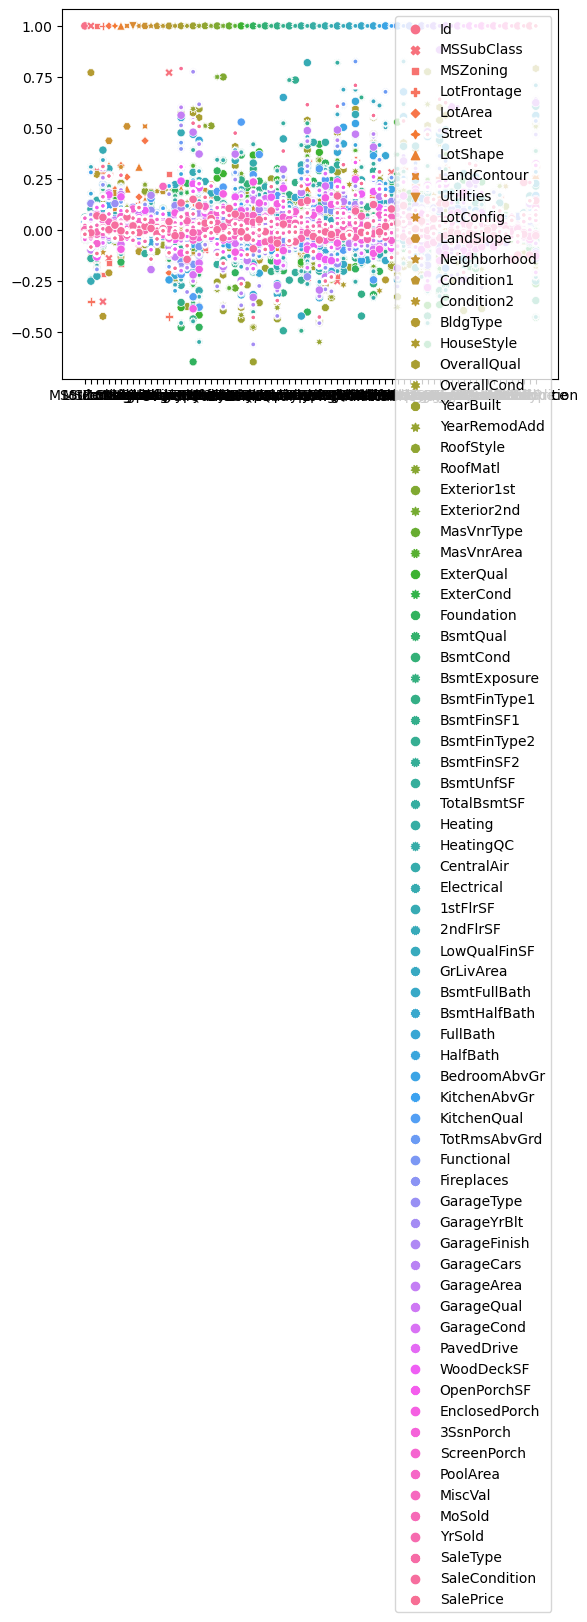

In [82]:
sns.scatterplot(train_dataset.corr())

# Using regression models

## Split datasets to X and Y

In [83]:
X, Y = train_dataset.drop(['SalePrice', 'Id'], axis=1), train_dataset['SalePrice']
train_X, test_X, train_Y, test_Y = train_test_split(X.to_numpy(), Y.to_numpy(), shuffle=True, test_size=0.2)

## Catboost

In [84]:
import catboost

In [85]:
model = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=1
)
model.fit(train_X, train_Y)
r2_score(model.predict(test_X), test_Y)

0.8608033288639785

# Submission

In [86]:
test_data = test_dataset.drop(['Id'], axis=1).to_numpy()
prediction = model.predict(test_data)
test_dataset['SalePrice'] = prediction

In [87]:
submission = test_dataset[['Id', 'SalePrice']]

In [88]:
submission.to_csv('submission.csv', index = False)